In [1]:
import rasterio 
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
# soybean and corn 5 soybean, 1 corn  class value 

In [ ]:
#opens the file or variable to open it 
scr= rasterio.open('C:\lab_6\GIS5120-Lab-6\data\CDL_2023_clip_20241030205700_384619517\CDL_2023_clip_20241030205700_384619517.tif')

In [3]:
scr

<open DatasetReader name='C:\lab_6\GIS5120-Lab-6\data\CDL_2023_clip_20241030205700_384619517\CDL_2023_clip_20241030205700_384619517.tif' mode='r'>

In [4]:
scr.profile 
#type of data meta data 

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 22112, 'height': 19692, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, -28365.0,
       0.0, -30.0, 2003985.0), 'blockxsize': 22112, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}

In [6]:
img=scr.read()

In [7]:
img

array([[[  0,   0,   0, ...,   0,   0,   0],
        [141, 176, 141, ...,   1,   1,   1],
        [142, 142, 141, ...,   1,   1,   1],
        ...,
        [121, 141, 141, ...,   2,   2,   2],
        [121, 141, 141, ...,   2,   2,   2],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8)

In [ ]:
#use rastio to read the data and convert to an array and save  then you get the numbpy array and then do the other operations with the numb py array 

In [19]:
#img.shape #1 band gets band information and row and collum 

#slisiing the band indexing to get a certain index 

img[0,:,:].shape #this needs to get in corret format for plt just : will get all of the rows and collums 

img_test= img[0,500:1000,500:1000]

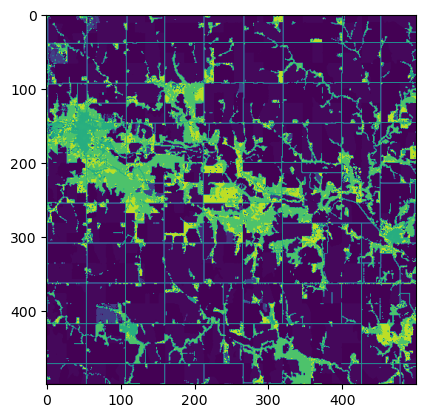

In [20]:
plt.imshow(img_test) #rows, collums, bands for plt , defining the x;x will give a specific area 
plt.show()

In [ ]:
soybean = (img_test == 5)*1 #gives true false statement (adding the *1 adds 0,1 )

In [24]:
soybean 

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

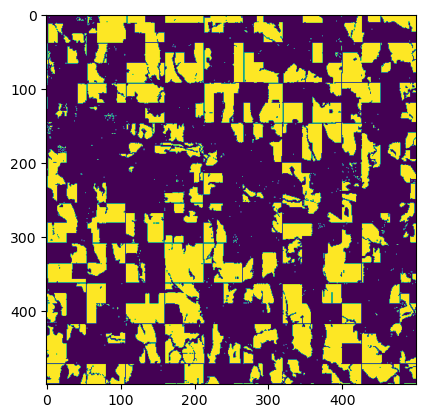

In [25]:
plt.imshow(soybean)
plt.show()

In [27]:
corn=(img_test == 1)*1 

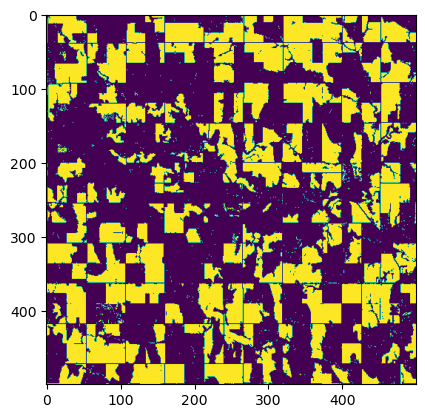

In [28]:
plt.imshow(corn)
plt.show()

In [2]:
#zonal statistics
county= gpd.read_file('C:\lab_6\GIS5120-Lab-6\data\cb_2018_us_county_20m\cb_2018_us_county_20m.shp')

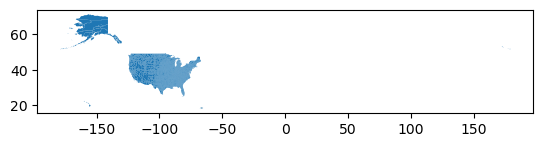

In [4]:
county.plot()
plt.show()

In [5]:
county

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.902 34.83527, -78.7996 34.85086,..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.2021, -80.29542 35.5029..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."
...,...,...,...,...,...,...,...,...,...,...
3215,38,005,01034216,0500000US38005,38005,Benson,06,3596569006,131708143,"POLYGON ((-99.84661 48.3713, -99.49292 48.3709..."
3216,72,079,01804520,0500000US72079,72079,Lajas,13,155287827,106643202,"POLYGON ((-67.10904 18.05608, -67.06791 18.066..."
3217,31,159,00835901,0500000US31159,31159,Seward,06,1479995670,11542537,"POLYGON ((-97.36812 41.04695, -96.91094 41.046..."
3218,37,023,01008539,0500000US37023,37023,Burke,06,1311146878,20719896,"POLYGON ((-81.90665 35.88338, -81.94319 35.960..."


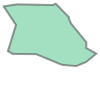

In [ ]:
county.iloc[0,9] #shape of a particular one in a shapefile 

In [7]:
type(county.iloc[0,9]) 

shapely.geometry.polygon.Polygon

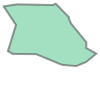

In [9]:
county.loc[0,'geometry']